# In-Class Quiz Nº 3

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: ruben santos
## Number: A49063

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q3.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: CIFAR-10 (small version)

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow.keras.datasets.cifar10 as cifar10

(X1,y1),(X2,y2)=cifar10.load_data()
y1=y1.squeeze()
y2=y2.squeeze()


In [102]:
print(X1.shape, X2.shape, y1.shape, y2.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [103]:
np.unique(y1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Question 1: 
## a) Select for training a subset of 20000 images from the matrix X1. Make sure that there are 2000 examples per class and that this new training data is shuffled. Also make shure that the test set (matrix X2) is ordered per class.
## b) Use generators for training and validation as specified in the cell below. Build a test generator. Make sure that this generator does not shuffle the data. Use this generator to go through the test set and retreive the class of the examples in it. Plot the class of the 10000 examples in the test set.
## c) Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
### - Use 6 convolutional layers
### - Use 3 pooling layers
##  Build this network, compile and train the network using the  training and validation generators. Make sure to go through the whole training and validation sets in each epoch. Plot the  the losses and the accuracies curves for the training and validation sets during the training process. Train the network for 25 epochs.  Comment the results. 
## d) Use the test generator to obtain the confusion matrix and the total number of erros in the test set.

## 1.a)

In [104]:

indices = []
for class_label in range(10):
    class_indices = np.where(y1 == class_label)[0]
    np.random.shuffle(class_indices)
    indices.extend(class_indices[:2000])
np.random.shuffle(indices)
X_train = X1[indices]
y_train = y1[indices]


# Shuffle the training data
shuffle_indices = np.arange(len(X_train))
np.random.shuffle(shuffle_indices)
X_train = X_train[shuffle_indices]
y_train = y_train[shuffle_indices]


test_order = np.argsort(y2)
X_test = X2[test_order]
y_test = y2[test_order]
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (20000, 32, 32, 3) (20000,)
Test set shape: (10000, 32, 32, 3) (10000,)


## 1.b)

Training set shape: (20000, 32, 32, 3) (20000,)
Test set shape: (10000, 32, 32, 3) (10000,)


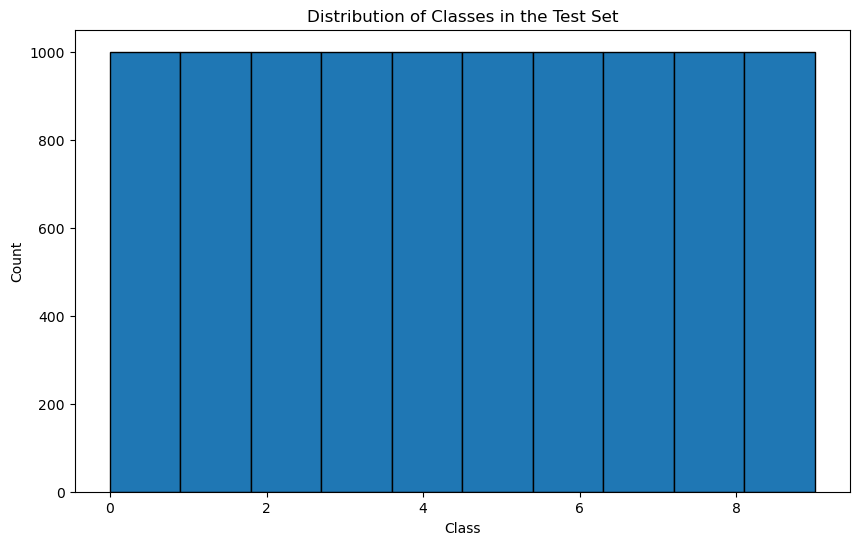

In [105]:
# Use generators for training and validation as specified in the cell below. 
# Build a test generator. Make sure that this generator does not shuffle 
# the data. Use this generator to go through the test set and retreive the 
# class of the examples in it. 
# Plot the class of the 10000 examples in the test set.

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
# X1=X_train
# X2=X_test
# y1=y_train
# y2=y_test
Y1=keras.utils.to_categorical(y_train)
Y2=keras.utils.to_categorical(y_test)


# X1 = np.array([tf.image.resize(img, (32, 32)) for img in X_train])
# print("Resized X1 shape:", X1.shape)



dataGen=ImageDataGenerator(rescale=1./255,validation_split=.25)
trainGen=dataGen.flow(X_train,y_train,batch_size=300,subset='training')
validGen=dataGen.flow(X_train,y_train,batch_size=100,subset='validation')
#testGen = ImageDataGenerator(rescale=1./255).flow(X_test, shuffle=False, batch_size=1)
testGen=ImageDataGenerator(rescale=1./255)
testGen=testGen.flow(X_test,y_test,batch_size=1000,shuffle=False)


# import time


test_steps = len(testGen)
test_classes = []
for _ in range(test_steps):
    images, labels = testGen.next()
    test_classes.extend(labels)

# Plot the class of the 10000 examples in the test set
plt.figure(figsize=(10, 6))
plt.hist(test_classes, bins=10, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in the Test Set')
# plt.xticks(range(num_classes))
plt.show()



## 1.c)

In [112]:
# Build (from scratch) a CNN with an architecture of your choice and 
# with the following restrictions:
### - Use 6 convolutional layers
### - Use 3 pooling layers
##  Build this network, compile and train the network using the 
#  training and validation generators. Make sure to go through the whole 
# training and validation sets in each epoch. Plot the  the losses and
#  the accuracies curves for the training and validation sets during the 
# training process. 
# Train the network for 25 epochs.  Comment the results.

model = keras.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D((2, 2)))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.AveragePooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (1, 1), activation='relu'))
model.add(keras.layers.AveragePooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(keras.layers.Conv2D(8, (3, 3), activation='relu'))
# model.add(keras.layers.AveragePooling2D((2, 2)))
# model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
# model.add(keras.layers.AveragePooling2D((2, 2)))    
# model.add(keras.layers.Conv2D(32, (1, 1), activation='relu'))
# model.add(keras.layers.Conv2D(32, (1, 1), activation='relu'))
# model.add(keras.layers.AveragePooling2D((2, 2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(16, activation='relu'))
# model.add(keras.layers.Dense(10, activation='softmax'))


# Compile the model
model.compile(optimizer='nadam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
# model.summary()
history = model.fit(trainGen, epochs=25, validation_data=validGen)
#


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_132 (Conv2D)         (None, 30, 30, 16)        448       
                                                                 
 conv2d_133 (Conv2D)         (None, 28, 28, 16)        2320      
                                                                 
 average_pooling2d_37 (Avera  (None, 14, 14, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_134 (Conv2D)         (None, 12, 12, 32)        4640      
                                                                 
 conv2d_135 (Conv2D)         (None, 10, 10, 32)        9248      
                                                                 
 average_pooling2d_38 (Avera  (None, 5, 5, 32)         0         
 gePooling2D)                                        

ValueError: in user code:

    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


In [111]:
# testGen, trainGen
# Train the model
history = model.fit(
    trainGen,
    # steps_per_epoch=len(trainGen),
    epochs=5,
    validation_data=validGen,
    # validation_steps=len(validGen)
)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\ruben\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


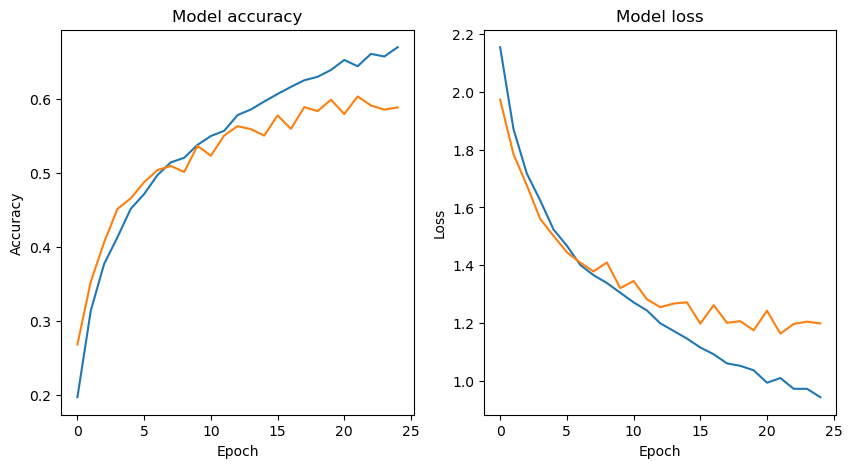

In [52]:
# Plot the  the losses and the accuracies curves for the training and 
# validation sets during the training process.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## 1.d)

In [53]:
# Use the test generator to obtain the confusion matrix 
# and the total number of erros in the test set.

testGen.reset()
model_y_pred = model.predict(X2)
model_y_pred = np.argmax(model_y_pred, axis=1)

model_cm = confusion_matrix(y2, model_y_pred)
print(model_cm)
print('Total number of errors: ', np.sum(y2 != model_y_pred))
print('Accuracy: ', np.sum(y2 == model_y_pred) / y2.shape[0] * 100)

313/313 [==============================] - 4s 12ms/step
[[690  60   3   4   1   8   1  14  99 120]
 [ 30 743   0   2   0   1   0   5  38 181]
 [283  54 119  38  30 130  14 145  87 100]
 [137  48   8 105   8 273   5 161  88 167]
 [141  41  33  39 152 133  21 298  48  94]
 [106  24   7  56  12 451   1 201  49  93]
 [ 82  38   9  69  23 120 201  96  60 302]
 [ 51  20   1  14   4  64   1 643  25 177]
 [176  71   0   2   0   5   0   8 635 103]
 [ 31 119   1   1   0   2   1  15  41 789]]
Total number of errors:  5472
Accuracy:  45.28


# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the problem. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Define new generators (for training, validation and testing) so that they perform the correct pre-process of he data so it can be used by the network. 
### c)  Train the network for 25 epochs and show the results. Print the confusion matrix and the total number of errors in the test set. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve
import tensorflow.keras.datasets.cifar10 as cifar10

(X1,y1),(X2,y2)=cifar10.load_data()
y1=y1.squeeze()
y2=y2.squeeze()

## 2.a)

In [61]:
# Consider that we want to use transfer learning to build a CNN 
# to tackle the problem. For the pre-trained CNN use MobileNetV2. 
# Use only one Dense layer for the output of the network.
### a)  Build and compile this network.

from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

base_model=MobileNetV2(weights='imagenet',
                       include_top=False,
                       input_shape=(32,32,3))
base_model.trainable = False
base_model.summary()


modelM = keras.models.Sequential()
modelM.add(base_model)
modelM.add(keras.layers.Flatten())
modelM.add(keras.layers.Dense(10, activation='softmax'))
modelM.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
modelM.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 16, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 16, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 16, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

## 2.b)

In [ ]:
#  Define new generators (for training, validation and testing) so that 
# they perform the correct pre-process of the data so it can be used by 
# the network. 




In [62]:
print(X1.shape, X2.shape, y1.shape, y2.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


In [41]:
# X1 = X1.reshape((X1.shape[0], 32, 32, 1))
# X2 = X2.reshape((X2.shape[0], 32, 32, 1))

# add extra dimension for RGB channel
# X1 = np.concatenate((X1, X1, X1), axis=3)
# X2 = np.concatenate((X2, X2, X2), axis=3)

# # resize images to 32x32
# X1 = np.array([tf.image.resize(img, (32, 32)) for img in X1])
# X2 = np.array([tf.image.resize(img, (32, 32)) for img in X2])

# # preprocess input
# X1 = preprocess_input(X1)
# X2 = preprocess_input(X2)

In [ ]:
#  Define new generators (for training, validation and testing) so that 
# they perform the correct pre-process of the data so it can be used by 
# the network. 

X1 = preprocess_input(X1)
X2 = preprocess_input(X2)

dataGen=ImageDataGenerator(rescale=1./255,validation_split=.25) 
trainGen=dataGen.flow(X1,Y1,batch_size=300,subset='training')
validGen=dataGen.flow(X1,Y1,batch_size=100,subset='validation')

testGen=ImageDataGenerator(rescale=1./255)
testGen=testGen.flow(X2,Y2,batch_size=1000,shuffle=False, subset='testing')




## 2.c)

In [ ]:
#  Train the network for 25 epochs and show the results. 
# Print the confusion matrix and 
# the total number of errors in the test set. 
# Compare the results with the ones obtained in the previous question 
# and state the possible reasons for the differences in performance.

# traingen, validgen, testgen

# history=modelM.fit(trainGen,
#                   epochs=25,
#                   validation_data=validGen)



In [ ]:
history2 = modelM.fit(
    trainGen,
    steps_per_epoch=len(trainGen),
    epochs=25,
    validation_data=validGen,
    validation_steps=len(validGen)
)


In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.subplot(1,2,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# testGen.reset()
# pred=model.predict(testGen)
# pred=np.argmax(pred,axis=1)
# y2=np.argmax(Y2,axis=1)
# confusion_matrix(y2,pred)
# erros=np.sum(y2!=pred)
# erros, erros/len(y2)


testGen.reset()
model_y_pred = model.predict(X2)
model_y_pred = np.argmax(model_y_pred, axis=1)

model_cm = confusion_matrix(y2, model_y_pred)
print(model_cm)
print('Total number of errors: ', np.sum(y2 != model_y_pred))
print('Accuracy: ', np.sum(y2 == model_y_pred) / y2.shape[0] * 100)

#### Differences in performance
  - Print the confusion matrix and the total number of errors in the test set